In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from fit_gamma_to_xy import gamma_to_XY
from Dataset_Network import BasicNN, NotSoBasicNN

DTYPE = torch.float32

In [2]:
potential_type = 'Disk'
x_path   = 'x_'+potential_type+'Potential'
y_path   = 'y_'+potential_type+'Potential'

x_data = np.loadtxt(x_path+'.txt')
y_data = np.loadtxt(y_path+'.txt')

x_data = torch.from_numpy(x_data)
y_data = torch.from_numpy(y_data)

data_tensor = torch.cat((x_data[:,None],y_data[:,None]), dim=1)

In [4]:
fitting = gamma_to_XY(data_tensor)
fitting.NN_interpolation(qty=1e6, bs=1, lr=0.001, e=5000, 
                         model_type='Not So Basic',
                         save_name=potential_type+'Potential_BasicNN_weights')

100%|██████████| 5000/5000 [01:26<00:00, 57.77it/s]


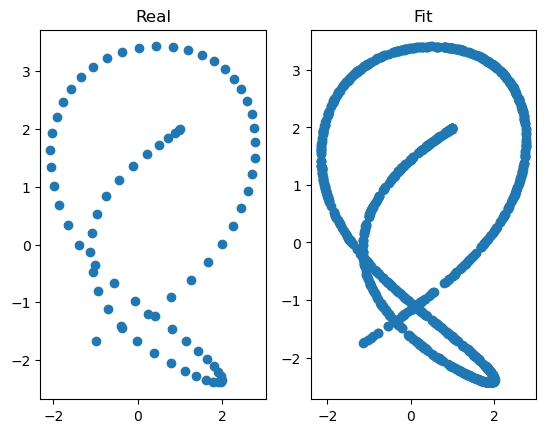

In [6]:
model = NotSoBasicNN()
model.load_state_dict(torch.load(potential_type+'Potential_BasicNN_weights.pth'))
gamma_valid = torch.rand(1000)*fitting.get_gamma(qty=3).max().item()
outputs     = model.forward(gamma_valid[:,None])
plt.subplot(1,2,1)
plt.title('Real')
plt.scatter(x_data,y_data)
plt.subplot(1,2,2)
plt.title('Fit')
plt.scatter(outputs[:,0].detach().numpy(),outputs[:,1].detach().cpu())